In [1]:
#preprocessing

In [20]:
#导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import radians, sin, cos, sqrt, atan2
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D  # 用于3D图
import geopandas as gpd
from shapely.geometry import Point
# import h3

ModuleNotFoundError: No module named 'h3'

In [3]:
#导入数据
iBite_table = pd.read_csv('./iBite_table.csv')

#存储所需的列
iBite_table = iBite_table[['infraclass', 'cohort', 'order', 'suborder', 'superfamily', 'family', 'subfamily', 'tribe', 'genus', 'species',
                           'iBite', 'ID', 'specimen', 'amplification',
                           'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l',
                           'latitude', 'longitude', 'country']]

#排序
iBite_table.sort_values(by=['order', 'family'], inplace=True)

# 查看数据的前几行
print("数据预览：")
print(iBite_table.head())

# 检查数据的列类型
print("\n数据类型：")
print(iBite_table.dtypes)

# 检查缺失值
print("Missing values in each column:")
print(iBite_table.isnull().sum())

数据预览：
  infraclass        cohort      order suborder  superfamily      family  \
0   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
1   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
2   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
3   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
4   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   

    subfamily tribe     genus    species  ...  amplification head.w head.h  \
0  Blaberinae     -  Blaberus  craniifer  ...            2.0   6.21   7.59   
1  Blaberinae     -  Blaberus  craniifer  ...            2.0   6.88   7.98   
2  Blaberinae     -  Blaberus  craniifer  ...            2.0   6.88   7.98   
3  Blaberinae     -  Blaberus  craniifer  ...            2.0   6.26   7.64   
4  Blaberinae     -  Blaberus  craniifer  ...            2.0   6.21   7.59   

   head.l  th.w  body.l  wing.l  latitude  longitude   country  
0    3.21

In [4]:
#缺失值处理
# 删除含有缺失值的行
data_cleaned = iBite_table.dropna(subset=['latitude', 'longitude']).copy()

# 填充缺失值（均值、中位数等）
# data_cleaned['head.w'].fillna(data_cleaned['head.w'].mean(), inplace=True)

# 保存清洗后的数据
cleaned_file_path = './iBite_table_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Original data rows: {iBite_table.shape[0]}, Cleaned data rows: {data_cleaned.shape[0]}")


Original data rows: 1906, Cleaned data rows: 1355


In [5]:
# 将所有非数值列进行编码
# 定义需要编码的列
non_numeric_cols = ['infraclass', 'cohort', 'order', 'suborder', 
                    'superfamily', 'family', 'subfamily', 'tribe', 
                    'genus', 'species', 'ID', 'country']

# 对每个非数值列进行标签编码
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    data_cleaned.loc[:, col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

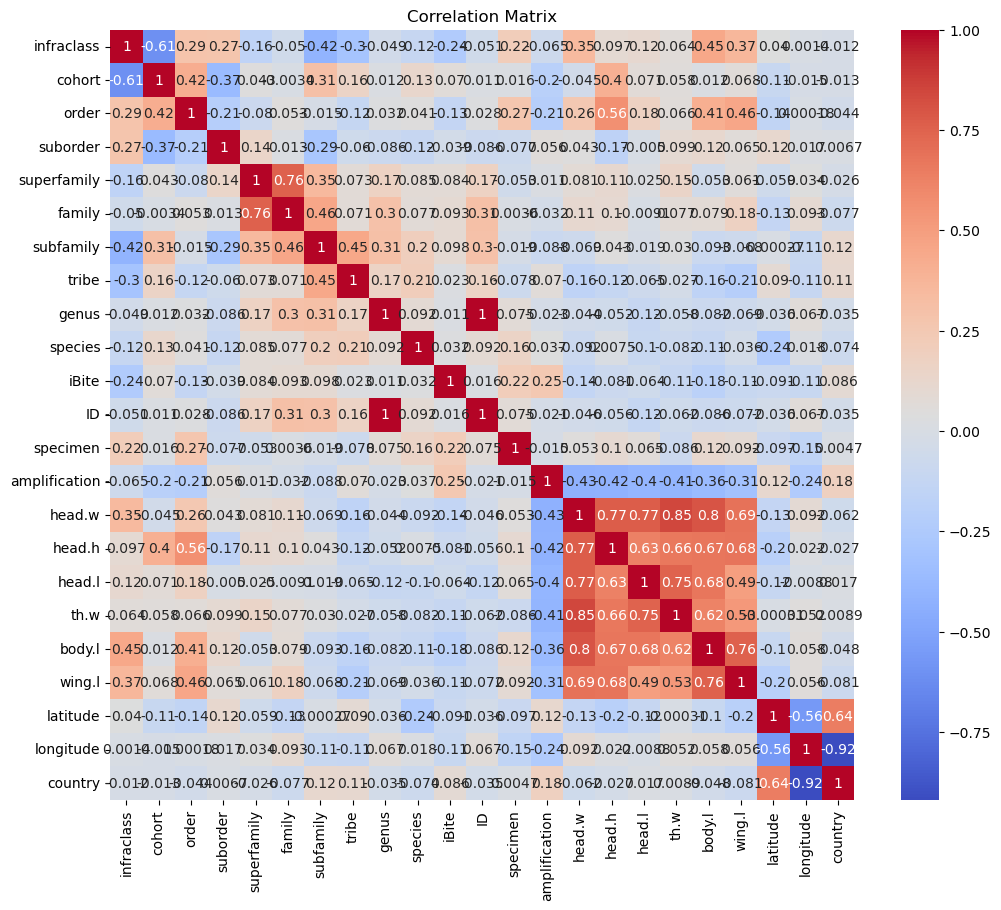

In [6]:
# 计算相关性矩阵
corr_matrix = data_cleaned.corr()
# print(corr_matrix['iBite'].sort_values(ascending=False))

# 热力图可视化
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

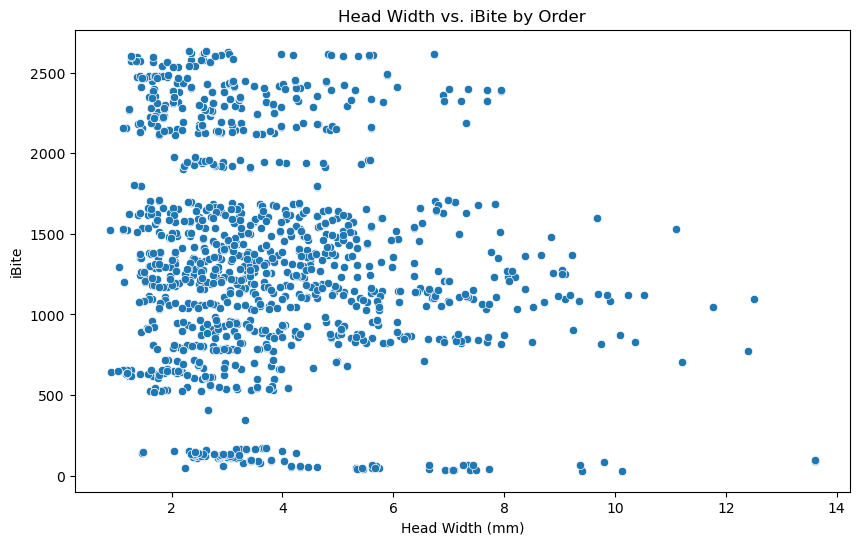

order
1     451
3     359
8     351
7     100
6      30
4      24
0      20
5       7
10      6
9       4
2       3
Name: count, dtype: int64


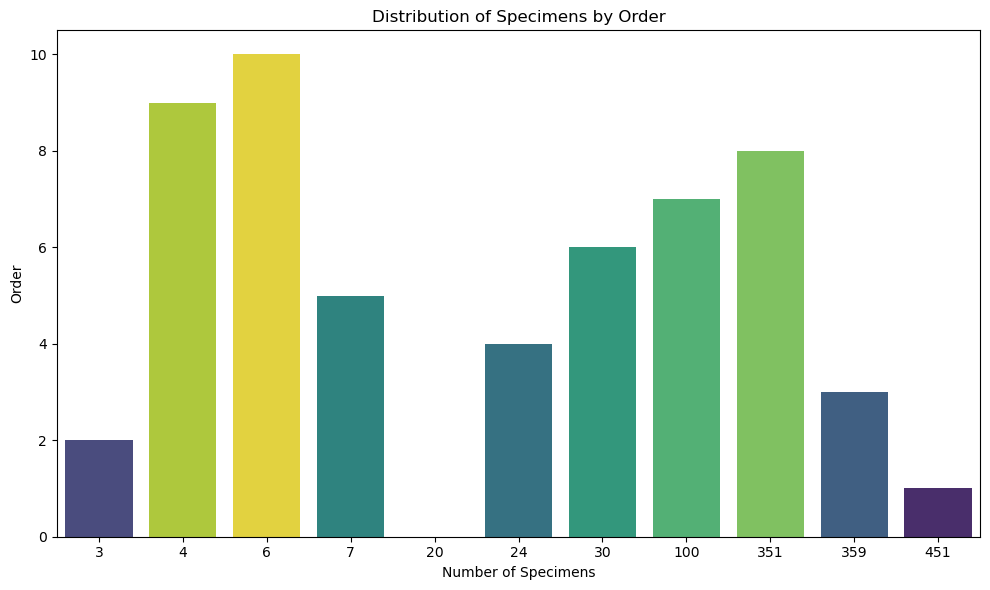

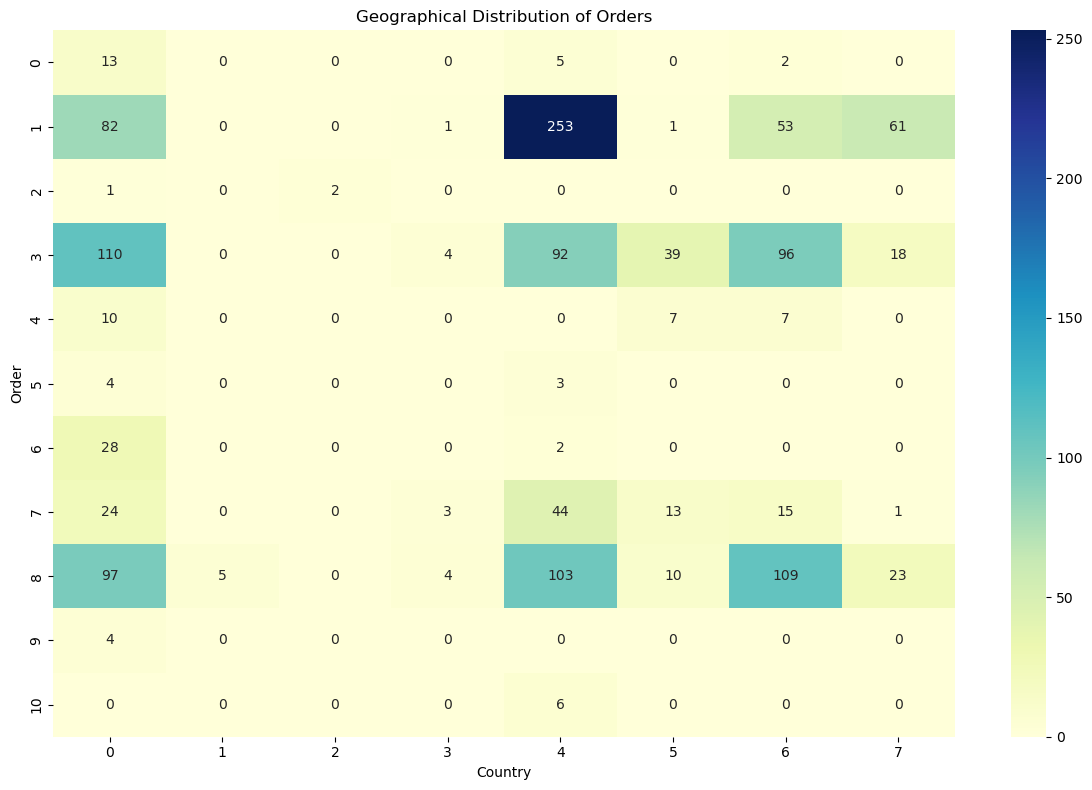

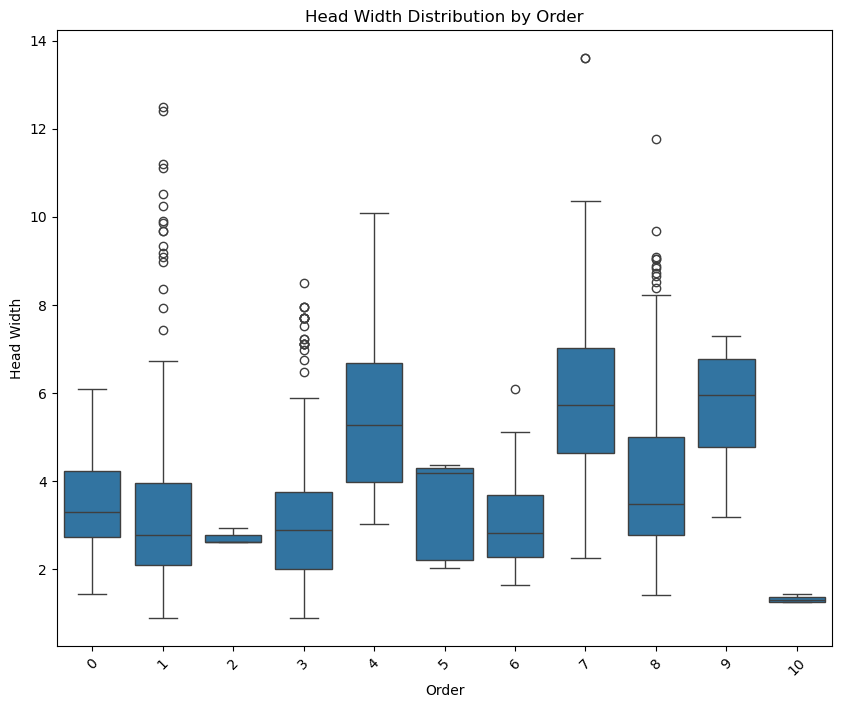

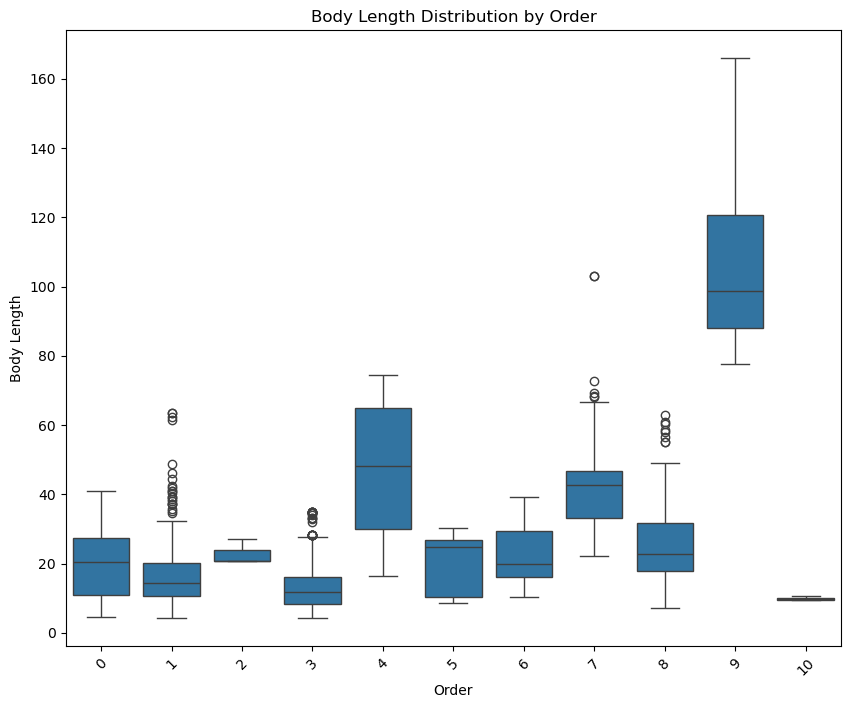

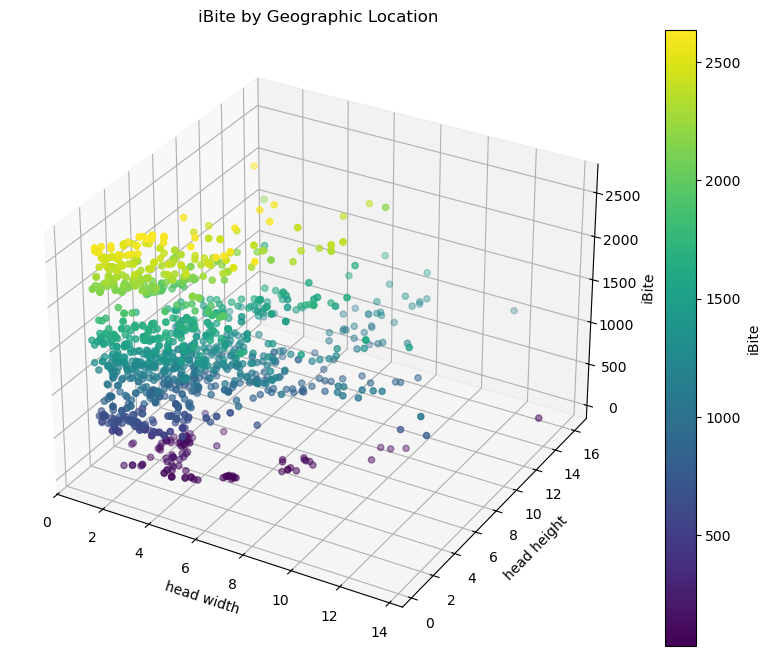

In [7]:
# 绘制头部宽度与咬合力的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='head.w', y='iBite')
plt.title('Head Width vs. iBite by Order')
plt.xlabel('Head Width (mm)')
plt.ylabel('iBite')
plt.show()

# 统计不同种群的数量并可视化种群数量
order_counts = data_cleaned['order'].value_counts()
print(order_counts)

plt.figure(figsize=(10, 6))
sns.barplot(y=order_counts.index, x=order_counts.values, hue=order_counts.index, palette='viridis', legend=False)
plt.xlabel('Number of Specimens')
plt.ylabel('Order')
plt.title('Distribution of Specimens by Order')
plt.tight_layout()
plt.show()

# 计算每个 Order 在每个 Country 的数量
country_order_distribution = data_cleaned.groupby(['order', 'country']).size().reset_index(name='counts')

# 将数据转换为矩阵形式
pivot_table = country_order_distribution.pivot(index='order', columns='country', values='counts').fillna(0)

# 可视化地理分布
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Geographical Distribution of Orders')
plt.xlabel('Country')
plt.ylabel('Order')
plt.tight_layout()
plt.show()

#形态特征的分布
# 以头部宽度为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='head.w', data=data_cleaned)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Head Width')
plt.title('Head Width Distribution by Order')
plt.show()

# 以体长为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='body.l', data=data_cleaned)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Body Length')
plt.title('Body Length Distribution by Order')
plt.show()

# iBite by dimensions
# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data_cleaned['head.w'], data_cleaned['head.h'], data_cleaned['iBite'], c=data_cleaned['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('head width')
ax.set_ylabel('head height')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()

In [8]:
#define columns
cols = ['iBite', 'genus', 'species', 'head.w', 'head.h', 'head.l', 'th.w', 'body.l' 'wing.l', 'latitude', 'longitude']

In [9]:
# 生成组合特征
data_cleaned['head_w_body_l_ratio'] = data_cleaned['head.w'] / data_cleaned['body.l']
data_cleaned['head_volume'] = data_cleaned['head.w'] * data_cleaned['head.h'] * data_cleaned['head.l']
data_cleaned['wing_body_ratio'] = data_cleaned['wing.l'] / data_cleaned['body.l']

feature_cols = ['genus', 'species', 'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'latitude', 'longitude']

# 使用多项式特征生成新的组合特征
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(data_cleaned.loc[:, feature_cols])
# 使用多项式特征生成新的组合特征
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(data_cleaned.loc[:, feature_cols])

# 将新的特征列加入到组合特征的生成中
feature_cols = ['head_w_body_l_ratio', 'head_volume', 'wing_body_ratio']

# 更新特征列表
cols = ['iBite', 'genus', 'species', 'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'head_w_body_l_ratio', 'head_volume', 'wing_body_ratio', 'latitude', 'longitude']

# # 将处理后的数据保存为新的 CSV 文件
# processed_file_path = './iBite_table_processed.csv'
# data_cleaned.to_csv(processed_file_path, index=False)
# print(f"清理后的数据已保存至 {processed_file_path}")

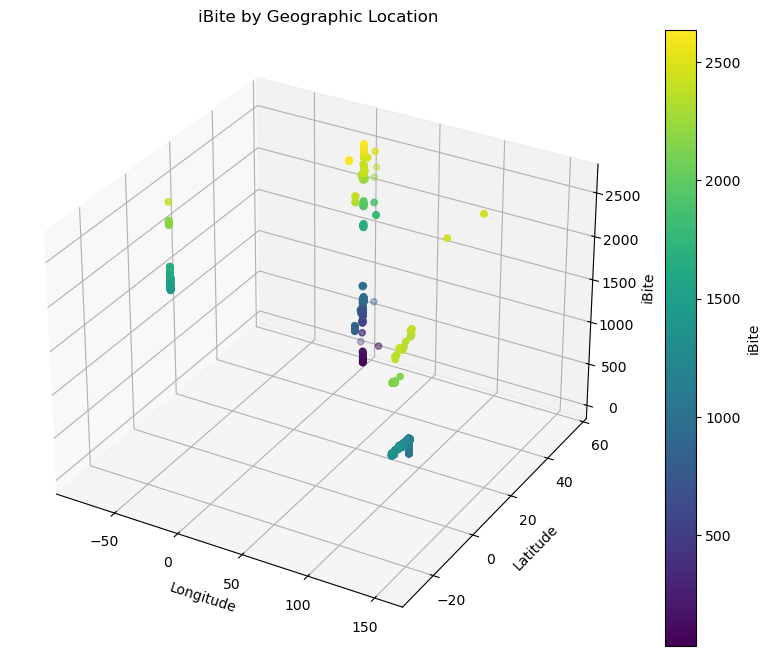

In [10]:
# iBite by Geographic Location
# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data_cleaned['longitude'], data_cleaned['latitude'], data_cleaned['iBite'], c=data_cleaned['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()

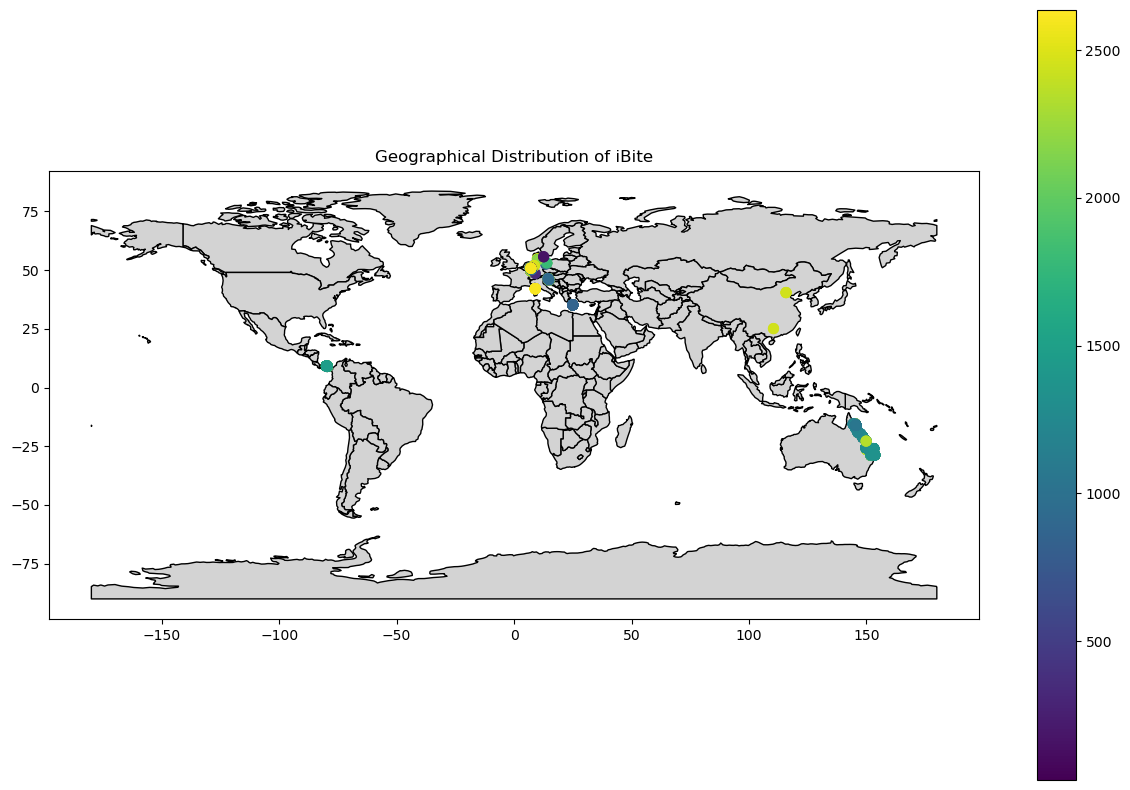

/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 53 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's {'I': 0.5157036364200839, 'p-value': 0.001}


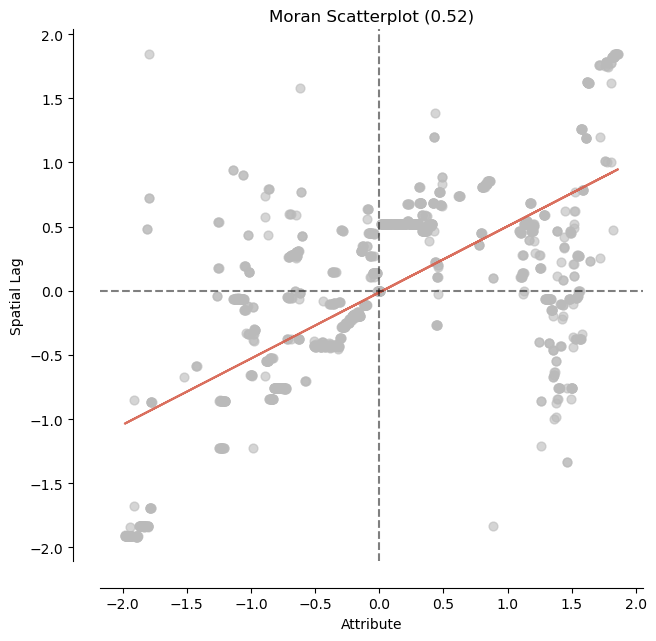

In [11]:
# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(data_cleaned['longitude'], data_cleaned['latitude'])]
geo_data = gpd.GeoDataFrame(data_cleaned, geometry=geometry)

# 读取世界地图数据
world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# 绘制咬合力的空间分布
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
geo_data.plot(ax=ax, column='iBite', cmap='viridis', legend=True, markersize=50)
plt.title('Geographical Distribution of iBite')
plt.show()

# 空间自相关分析（莫兰指数）
from esda import Moran
from libpysal.weights import KNN

# 计算空间权重矩阵
w = KNN.from_dataframe(geo_data, k=7)
w.transform = 'R'

# 计算莫兰指数
moran = Moran(geo_data['iBite'], w)
moran_results = {'I': moran.I, 'p-value': moran.p_sim}
print(f"Moran's", moran_results)

# 可视化莫兰散点图
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moran)
plt.show()


In [12]:
from sklearn.metrics import pairwise_distances

# 计算样本间的地理距离（使用经纬度）
coords = np.radians(data_cleaned.loc[:, ['latitude', 'longitude']])
distances = pairwise_distances(coords, metric='haversine') * 6371  # 转换为地球距离（单位:公里）

# 将距离矩阵转换为可用的特征
# 示例：可以计算每个样本到某个参考点的平均距离、最短距离等
data_cleaned.loc[:, 'mean_distance_to_others'] = distances.mean(axis=1)


In [13]:
import numpy as np
from pykrige.ok import OrdinaryKriging

# 使用现有的纬度、经度和 iBite 数据进行插值
OK = OrdinaryKriging(data_cleaned['longitude'], data_cleaned['latitude'], data_cleaned['iBite'], variogram_model='linear')

# 生成插值网格
gridx = np.linspace(min(data_cleaned['longitude']), max(data_cleaned['longitude']), 100)
gridy = np.linspace(min(data_cleaned['latitude']), max(data_cleaned['latitude']), 100)
z, ss = OK.execute('grid', gridx, gridy)

# 可以将插值结果应用于新的点或用于可视化



In [14]:
# 计算与参考点（伦敦）的地理距离
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球平均半径，单位为千米
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# 计算与伦敦的距离
reference_point = (51.5074, -0.1278)  # 伦敦的经纬度
data_cleaned['distance_to_reference'] = data_cleaned.apply(
    lambda row: haversine(row['latitude'], row['longitude'], reference_point[0], reference_point[1]), axis=1)


In [15]:
# 克里金插值
longitude = data_cleaned['longitude'].values
latitude = data_cleaned['latitude'].values
iBite = data_cleaned['iBite'].values

# 创建克里金插值模型
OK = OrdinaryKriging(longitude, latitude, iBite, variogram_model='linear', verbose=False, enable_plotting=False)
z, ss = OK.execute('points', longitude, latitude)

# 将插值结果加入数据集
data_cleaned['kriging_iBite'] = z
data_cleaned['kriging_variance'] = ss


In [17]:
from sklearn.cluster import DBSCAN

# 使用DBSCAN进行空间聚类
coords = data_cleaned[['latitude', 'longitude']].values
db = DBSCAN(eps=0.1, min_samples=5, metric='haversine').fit(np.radians(coords))

# 将聚类结果加入数据集
data_cleaned['cluster'] = db.labels_
# X['cluster'] = data_cleaned['cluster']

In [21]:
# # 将经纬度转换为H3网格编码
# def latlon_to_h3(lat, lon, resolution=8):
#     return h3.geo_to_h3(lat, lon, resolution)

# # 应用函数生成H3编码
# data_cleaned['h3_index'] = data_cleaned.apply(lambda row: latlon_to_h3(row['latitude'], row['longitude']), axis=1)

# # 对H3编码进行标签编码
# data_cleaned['h3_index'] = label_encoder.fit_transform(data_cleaned['h3_index'])


In [ ]:
# # 更新特征列表，包含新生成的空间特征
# feature_cols = ['genus', 'species', 'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 
#                 'latitude', 'longitude', 'distance_to_reference', 'kriging_iBite', 'kriging_variance', 'cluster', 'h3_index']


In [22]:
# 更新特征列表根据空间数据
feature_cols = ['genus', 'species', 'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'latitude', 'longitude']

In [23]:
# 特征缩放
# 选取特征列进行标准化
scaler = StandardScaler()
data_cleaned.loc[:, feature_cols] = scaler.fit_transform(data_cleaned[feature_cols])

X = data_cleaned[feature_cols]
y = data_cleaned['iBite']

print("\n标准化后的空间特征和形态特征预览：")
print(X.head())

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用随机森林模型进行训练
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 进行预测和评估
y_pred = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R²: {r2_score(y_test, y_pred)}")



标准化后的空间特征和形态特征预览：
       genus   species    head.w    head.h    head.l      th.w    body.l  \
11 -1.064404  0.764406 -0.262986 -0.142677 -0.766951 -0.430514  0.043552   
12 -1.064404  0.764406 -0.262986 -0.142677 -0.766951 -0.430514  0.043552   
13  1.050044  0.776395 -0.127646 -0.076605 -0.734680 -0.290133  0.348621   
14  1.050044  0.764406 -0.184905  0.016674 -0.721772 -0.094451 -0.048041   
31   1.00347  1.183999 -0.247370 -0.088265 -0.979938  0.224597 -0.319934   

      wing.l  latitude  longitude  
11  0.660228 -1.235132   1.425063  
12  0.660228 -1.235132   1.425063  
13  0.762769 -1.235132   1.425063  
14  0.687047 -1.402920   1.462618  
31 -1.155538  0.977303  -0.279847  
MSE: 261103.67334039367
R²: 0.4677873176013303


In [24]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# 使用交叉验证评估模型的稳定性
# 5-Fold交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 评分函数使用负的均方误差，scikit-learn希望评分越高越好
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring=mse_scorer)

# 输出交叉验证结果
print(f"Cross-validated MSE scores: {-cv_scores}")
print(f"Average MSE: {-cv_scores.mean()}")


Cross-validated MSE scores: [261262.00255995 239870.62480215 272637.52151257 255130.61538176
 243752.33184103]
Average MSE: 254530.6192194926


所选特征数量: 4
Feature columns: 10
X shape: 10
Selected Features: ['species', 'th.w', 'latitude', 'longitude']
     Feature  Importance
2   latitude    0.438245
3  longitude    0.205923
1       th.w    0.190019
0    species    0.165813


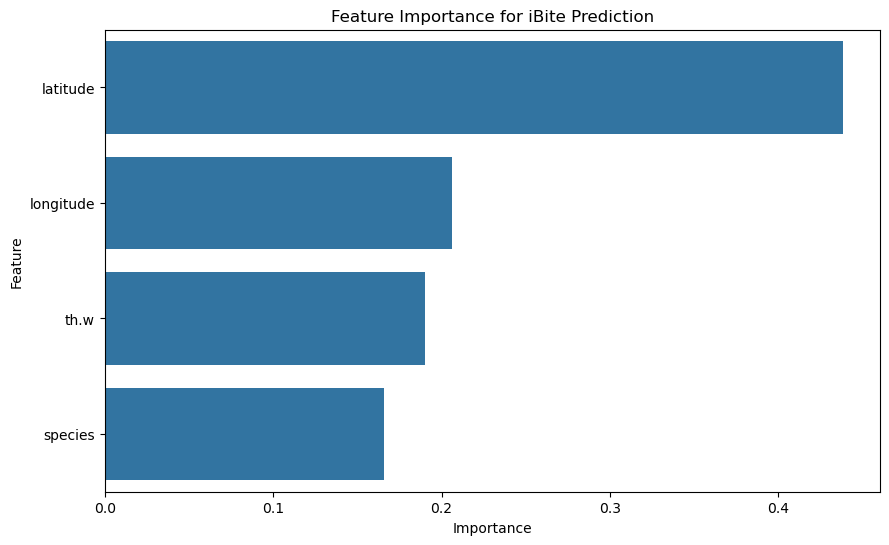

In [25]:
from sklearn.feature_selection import RFECV

# 使用递归特征消除和交叉验证
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
print(f"所选特征数量: {rfecv.n_features_}")

# 检查特征列与X的形状是否一致
print(f"Feature columns: {len(feature_cols)}")
print(f"X shape: {X.shape[1]}")


# 获取所选特征的名称，检查选中的特征和对应的重要性
selected_features = [feature for feature, support in zip(feature_cols, rfecv.support_) if support]
print(f"Selected Features: {selected_features}")

# 输出特征重要性
importances = rfecv.estimator_.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for iBite Prediction')
plt.show()


In [26]:
# import shap

# # 训练模型（以 Random Forest 为例）
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# # 创建 SHAP 解释器
# explainer = shap.Explainer(rf, X_train)
# shap_values = explainer(X_test)

# # 可视化整体特征重要性
# shap.summary_plot(shap_values, X_test, feature_names=feature_cols)


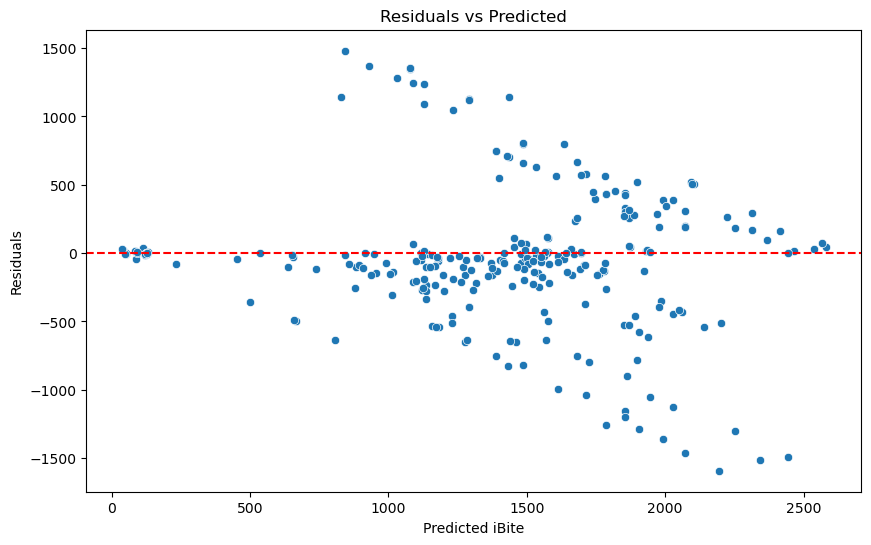

In [27]:
# 预测结果
y_pred = rf.predict(X_test)
residuals = y_test - y_pred

# 绘制残差图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted iBite')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


In [28]:
from sklearn.decomposition import PCA

# 初始化 PCA，设置希望保留的主成分数量（例如：保留95%的方差）
pca = PCA(n_components=0.95)  # 可以通过 n_components=0.95 保留95%的方差
X_pca = pca.fit_transform(X)

# 打印解释方差比例
print(f"保留的主成分数: {pca.n_components_}")
print(f"每个主成分的解释方差比例: {pca.explained_variance_ratio_}")

# 将降维后的特征用于模型训练
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 使用PCA后的特征训练随机森林
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

print("Random Forest with PCA MSE:", mean_squared_error(y_test, y_pred_pca))
print("Random Forest with PCA R2:", r2_score(y_test, y_pred_pca))

保留的主成分数: 7
每个主成分的解释方差比例: [0.45072007 0.16337286 0.1027205  0.09422334 0.06329575 0.04298249
 0.03357759]
Random Forest with PCA MSE: 321606.0406682863
Random Forest with PCA R2: 0.3444641686195503


In [29]:
# 将预处理后的数据保存为新的 CSV 文件
processed_file_path = './iBite_table_processed.csv'  # 保存路径
data_cleaned.to_csv(processed_file_path, index=False)
print(f"\n预处理数据已保存至 {processed_file_path}")


预处理数据已保存至 ./iBite_table_processed.csv
